# Read Data

In [1]:
import pandas as pd
import numpy as np

T2 = pd.read_csv('CountyVaccineApril07New.csv')
print(T2.shape)

T2

(1275, 168)


,State,County,AreaName,FIPS,Numb_White,Numb_Black,fluvax_Avg,fluvax_Disparity,fluvax_White,fluvax_Black,...,racial_n_bias_obs,racial_n_explicit_obs,racial_weighted_bias,racial_weighted_explicit_diff,sex_bias,sex_explicit,sex_n_bias_obs,sex_n_explicit_obs,sex_weighted_bias,sex_weighted_explicit
0,California,Alameda,"Alameda, California",6001,186256.131102,42389.339979,43.524675,0.436534,47.0,28.0,...,9407,7602,0.332588,0.420232,0.170999,0.445860,8195,8755,0.188982,0.388208
1,California,Amador,"Amador, California",6005,10295.982504,66.627963,46.680508,0.235644,47.0,36.0,...,78,65,0.388767,0.543750,0.229522,0.261364,40,44,0.281597,0.479462
2,California,Butte,"Butte, California",6007,38755.387296,508.553106,39.674987,0.378072,40.0,25.0,...,1362,1074,0.365207,0.593670,0.301398,0.791468,1390,1465,0.319832,0.720137
3,California,Calaveras,"Calaveras, California",6009,8185.189474,61.136490,39.882130,0.250739,40.0,30.0,...,123,83,0.356744,0.573546,0.272430,1.086957,65,69,0.293506,1.050314
4,California,Colusa,"Colusa, California",6011,1767.066692,29.238932,44.000000,0.000000,44.0,44.0,...,14,12,0.372233,0.600925,0.192090,0.500000,9,11,0.283732,0.735348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Oregon,Columbia,"Columbia, Oregon",41009,8522.000000,71.000000,NaN,NaN,37.0,NaN,...,260,195,0.349609,0.678180,0.226210,1.025424,112,118,0.265702,0.967806
1271,Oregon,Clatsop,"Clatsop, Oregon",41007,6313.000000,44.000000,NaN,NaN,42.0,NaN,...,199,172,0.335295,0.458194,0.286095,0.570588,86,85,0.298405,0.655248
1272,Oregon,Clackamas,"Clackamas, Oregon",41005,70058.000000,942.000000,45.880626,0.196161,46.0,37.0,...,2804,2428,0.344978,0.477498,0.265312,1.078068,1294,1377,0.284982,1.012374
1273,Oregon,Benton,"Benton, Oregon",41003,22067.000000,236.000000,53.748922,0.334890,54.0,36.0,...,2286,1969,0.333942,0.483229,0.242674,0.723443,1310,1365,0.259986,0.678525


In [2]:
path = 'Data/VACCINE HESITANCY/county_week26_data_fixed.xlsx'

VaxHesitancy = pd.read_excel(path)



def convertFIPS(v):
    v = str(int(v))
    if len(v) == 4:
        v = '0' + v
    else:
        v = v
    return v

VaxHesitancy['FIPS'] = VaxHesitancy['FIPS Code']# .apply(convertFIPS)



print(VaxHesitancy.shape)



# T2


VaxHesitancy = VaxHesitancy[['FIPS', 'Estimated hesitant', 'Estimated strongly hesitant']]
VaxHesitancy.columns = ['FIPS', 'hesitancy', 'strong_hesitancy']
VaxHesitancy

(3142, 17)


,FIPS,hesitancy,strong_hesitancy
0,1005,0.23,0.11
1,1003,0.20,0.10
2,1071,0.24,0.12
3,1073,0.20,0.10
4,1121,0.23,0.11
...,...,...,...
3137,15007,0.11,0.05
3138,15003,0.10,0.04
3139,15009,0.11,0.05
3140,15001,0.12,0.05


In [3]:
T2 = pd.merge(T2, VaxHesitancy, on = 'FIPS')
T2.shape

(1275, 170)

# Preprocessing

In [4]:
T2 = T2[-T2['Vax_Disparity'].isna()]
print(T2.shape)



T2['FacNum'] = T2[['FQHC', 'HOPD', 'PHMCY', 'RUHC',] ].sum(axis = 1)
T2['vehicle'] = 1- T2['EP_NOVEH']
T2['MedianIncome_Disprt'] = T2['MedianIncome_Disparity'] / T2['MedianIncome']
T2['Above75_Diff'] = T2['Above75_WhiteRate'] - T2['Above75_BlackRate']
T2['Rate_DiffY'] = T2['Rate_Diff']*100
T2['FluDiffY'] = T2['FluDiff']*100
T2['logFacNum' ] = np.log(T2['FacNum' ] + 1)
T2['logcases' ] = np.log(T2['cases' ] + 1)
T2['CaseRate' ] = T2['cases' ]/T2['Total_Whole']
T2['FacNumRate' ] = T2['FacNum' ]/T2['Total_Whole']

print(T2.shape)

(1178, 170)
(1178, 180)


# Make Directory

In [5]:
from datetime import datetime
import os

folder = str(datetime.now()).split('.')[0].replace(':', '-').replace(' ', '_')
Result = 'RegResult'
path = os.path.join(Result, folder)
print('Generate Path:', path)
os.makedirs(path)

Generate Path: RegResult/2021-04-17_17-51-51


# Preprocess Data

In [6]:


def get_stata(T2, cols, path):
    T2['log_Total_Whole'] = np.log(T2['Total_Whole'])
    T2['org_Total_Whole'] = T2['Total_Whole'] + 0
    T2['BlackWhiteRatio'] = T2['Total_Black']/T2['Total_White']
    
    
    prefix_cols  = ['State', 'County']
    addtion_cols = ['log_Total_Whole', 'BlackWhiteRatio', 'Total_Black', 'org_Total_Whole']
    addtion_cols = addtion_cols if 'CI_Disparity' in cols else addtion_cols + ['CI_Disparity']
    
    print('prefix cols:', prefix_cols)
    print('addition cols:', addtion_cols)
    
    
    # Step1: Slicing
    newT = T2[prefix_cols + cols + addtion_cols]
    
    
    
    # Step2: drop nan
    print('From:', newT.shape)#.head()
    newT2 = newT.dropna()
    print('To  :', newT2.shape)
    # newT2
    
    
    # Step3: Dropping
    
    # return newT2
    # newT2 = newT2[newT2['org_Total_Whole'] >= 20000];print(newT2.shape)
#     newT2 = newT2[newT2['Total_Black'] >= 400];print(newT2.shape)
    
    newT2 = newT2[newT2['Total_Black'] >= 273];print(newT2.shape)
    # newT2 = newT2[newT2['BlackWhiteRatio'] >= 0.01];print(newT2.shape)
    # newT2 = newT2[newT2['CI_Disparity'] >= -0.05]; print(newT2.shape)
    
    newT3 = newT2.copy()
    path1 = os.path.join(path, 'DataVarDict.csv')
    newT2.describe().T.to_csv( path1)
    print(path1)
    
    
    Y = cols[0]
    if "Diff" in Y:
        not_normalized_cols = ['Rate_DiffY','FluDiffY', 'republican', 'urban']
    else:
        not_normalized_cols = ['republican', 'urban']
    
    # Step4: Normalizing, only cols
    # newT3 = newT3.copy()
    for i in cols:
        if i in not_normalized_cols:continue
        df = newT3[i]
        newT3[i]=(df-df.mean())/df.std()
    path2 = os.path.join(path, 'DataVarDictNorm.csv')
    newT3.describe().T.to_csv(path2 )
    print(path2)
    
    
    # if 'CI_Whole' in cols and 'HighSchool_Disparity' in cols:
        # newT3['CI_Whole_HS_Disparity'] = newT3['CI_Whole']  * newT3['HS_Disparity']
        # df = newT3['CI_HighSchool_Interaction']
        # newT3['CI_HighSchool_Interaction'] = (df-df.mean())/df.std()
            
            
    # Step5: Save Stata
    path3 = os.path.join(path, 'Data.dta')
    
    print(newT3.dtypes)
    
    
    # winsor
    # for col
    
    
    newT3.to_stata(path3)
    
    print(path3)
    
    return newT3


cols = ['Vax_Disparity', 'HighSchool_Disparity', 'HighSchool_Whole']
newT3 = get_stata(T2, cols, path)
# newT2 = newT2[newT2['CI_Disparity'] >= -0.05]

prefix cols: ['State', 'County']
addition cols: ['log_Total_Whole', 'BlackWhiteRatio', 'Total_Black', 'org_Total_Whole', 'CI_Disparity']
From: (1178, 10)
To  : (1141, 10)
(911, 10)
RegResult/2021-04-17_17-51-51/DataVarDict.csv
RegResult/2021-04-17_17-51-51/DataVarDictNorm.csv
State                    object
County                   object
Vax_Disparity           float64
HighSchool_Disparity    float64
HighSchool_Whole        float64
log_Total_Whole         float64
BlackWhiteRatio         float64
Total_Black               int64
org_Total_Whole           int64
CI_Disparity            float64
dtype: object
RegResult/2021-04-17_17-51-51/Data.dta


# Stata Code

## Get Regression Code

In [7]:
def get_regression(Y, X, CV, addText, state_dummy_num = '16'):
    # Y: string
    # X: list
    # CV: dict(string: list)
    
    reg_string = ' '.join(['reg', Y] + X + sum([v for k, v in CV.items()], []))
    # reg_string = reg_string+'dummy
   
    
    reg_string = reg_string + ' state_dummy1-state_dummy{} '.format(state_dummy_num)
    if addText.get('W'):
        reg_string = reg_string + ' [pweight=org_Total_Whole] '  ### 
    if addText.get('R'):
        reg_string = reg_string + ', r ' if ',' not in reg_string else reg_string + 'cluster(State) ' 
    if addText.get('C'):
        reg_string = reg_string + ', cluster(State) ' if ',' not in reg_string else reg_string + 'cluster(State)'
    return reg_string


# addText = {
#     'R': True,
#     'C': True,
#     'W': True
# }


# code = get_regression(Y, X, CV, addText, use_Age75 = False)
# print(code)    

## Get Outreg2 Code

In [8]:
def get_outreg2(Y, X, DocName, addText, replace = False):
    # Title = '_'.join(['Mdl', '.'.join([k for k, v in addText.items() if v] )])
    # Title = Title[:-1] if Title[-1] == '_' else Title
    # omit = "state_dummy1-state_dummy" + max_state + " o.state_dummy1-o.state_dummy" + max_state
    Title = Y
    TitleString = 'append ctitle({})'.format(Title) if not replace else 'replace ctitle({})'.format(Title)
    addTextString = 'addtext(SD, True, ' + ', '.join([k + ', ' + str(v) for k, v in addText.items()]) + ')' 
    d = ' '.join(['outreg2 using', 
                  DocName + ',', 
                  TitleString,  
                  addTextString, 
                  " keep (" +' '.join(X) + ') '
                  'excel'])
    return d
    
    
    
# DocName = 'Test.xlsx'
# Title = 'First'
# addText = {
#     'R': True,
#     'C': True,
#     'W': True
# }
# replace = True

# get_outreg2(Y, X, DocName, addText, replace, )

In [9]:
DataPath = os.path.join(os.getcwd(), path, 'Data.dta')
DataPath

'/Users/floydluo/Desktop/StataReg/RegResult/2021-04-17_17-51-51/Data.dta'

 # Set Regression Variables

In [10]:
Y  = 'Rate_DiffY' 
Y2 = 'FluDiffY' 
X_list = [
# Base Model
[
'MedianIncome', 
'MedianIncome_Diff',

'HighSchool_Whole',
'HighSchool_Diff',

'logFacNum',
'logcases', 

'CI_Whole',
'CI_Diff',

'urban',

'vehicle',

'republican',

'Segregation',

'racial_weighted_bias',

'hesitancy'],

# Robustness Check 
[
'FluDiff', 
'FluWhole'
],

[
'Above75_Diff',
'Above75_Whole'
],
]

all_variables = [Y, Y2] + sum(X_list, [])
print(all_variables)
newT3 = get_stata(T2, all_variables, path)

['Rate_DiffY', 'FluDiffY', 'MedianIncome', 'MedianIncome_Diff', 'HighSchool_Whole', 'HighSchool_Diff', 'logFacNum', 'logcases', 'CI_Whole', 'CI_Diff', 'urban', 'vehicle', 'republican', 'Segregation', 'racial_weighted_bias', 'hesitancy', 'FluDiff', 'FluWhole', 'Above75_Diff', 'Above75_Whole']
prefix cols: ['State', 'County']
addition cols: ['log_Total_Whole', 'BlackWhiteRatio', 'Total_Black', 'org_Total_Whole', 'CI_Disparity']
From: (1178, 27)
To  : (778, 27)
(759, 27)
RegResult/2021-04-17_17-51-51/DataVarDict.csv
RegResult/2021-04-17_17-51-51/DataVarDictNorm.csv
State                    object
County                   object
Rate_DiffY              float64
FluDiffY                float64
MedianIncome            float64
MedianIncome_Diff       float64
HighSchool_Whole        float64
HighSchool_Diff         float64
logFacNum               float64
logcases                float64
CI_Whole                float64
CI_Diff                 float64
urban                     int64
vehicle        

In [11]:
L = [
    'ssc install grstyle', 
    'ssc install coefplot', 
    'ssc install palettes',
    'ssc install colrspace',
    'clear all',
    'set more off',
    'use "' + DataPath + '"',
    '\n', 
    # "preserve\n", 
    "tab State, generate(state_dummy)",
    '\n',  
]

# 
# L = L  + ['winsor2 {}, replace cuts(1 99)'.format(i) for i in all_variables] + ['\n\n']
# L = L  + ['winsor2 {}, replace cuts(2 98)'.format(i) for i in all_variables] + ['\n\n']
L = L  + ['winsor2 {}, replace cuts(5 95)'.format(i) for i in all_variables] + ['\n\n']
# L = L  + ['winsor2 {}, replace cuts(10 90)'.format(i) for i in all_variables] + ['\n\n']


addText = {
    'R': True,
    'C': True,
    'W': True,
}
CV = {}

state_dummy_num = 16 
DocName = os.path.join(path, 'RegResult.doc')
DataPath = os.path.join(os.getcwd(), path, 'Data.dta')


Title = 'FVAD' if 'flu' in Y.lower() else 'CVAD'

Regression_Commands = []


for idx, X in enumerate(X_list):
    X_used = sum(X_list[:idx+ 1], [])
    reg_string = get_regression(Y, X_used, CV, addText, state_dummy_num)
    
    Regression_Commands.append(reg_string) 
    
    
    replace = True if idx == 0 else False
    out = get_outreg2(Title, X_used, DocName, addText, replace)

    L = L +[reg_string+'\n', out, '\n']
    if X_used[-1] == 'hesitancy':
        reg_string = get_regression(Y2, X_used, CV, addText, state_dummy_num)
        replace = True if idx == 0 else False
        out = get_outreg2('FVAD', X_used, DocName, addText, False)
        L = L +[reg_string+'\n', out, '\n']
        
        Regression_Commands.append(reg_string) 




visualization = [Regression_Commands[0], 'estimates store covid', 
                 Regression_Commands[1], 'estimates store flu', 
                 'grstyle init',
                 'grstyle set plain, horizontal grid',
                 'grstyle set color Accent: p#bar p#barline', 
                 'coefplot covid, bylabel(Covid Vaccination Disparity) || flu, bylabel(Flu Vaccination Disparity) ||, '
                 'keep(MedianIncome MedianIncome_Diff HighSchool_Whole HighSchool_Diff logFacNum logcases CI_Whole CI_Diff urban vehicle republican Segregation racial_weighted_bias hesitancy ) '
                 'xline(0) recast(bar) ciopts(recast(rcap)) citop barwidt(0.3) bgcolor(white) levels(95) '
                 'rename(MedianIncome="Median Income" MedianIncome_Diff = "Median Income Disparity" HighSchool_Whole="High School Graduation Rate" HighSchool_Diff="High School Disparity"  logFacNum="No. of Health Facilities" logcases="No. of COVID-19 Cases" CI_Whole="Home IT Rate"  CI_Diff="Home IT Disparity" urban="Urban" vehicle="Rate of Vehicle Ownership" republican="Political Ideology" Segregation="Segregation Index" racial_weighted_bias="Racial Bias" hesitancy="Vaccine Hesitancy") '
                 'note("The x-axis is percentage point.")']



L = L + visualization

stata_string =  '\n'.join(L)
StataCodePath = os.path.join(os.getcwd(), path, 'do_file.do')
print(StataCodePath, '\n\n\n')
print(stata_string)
with open(StataCodePath, 'w') as f:
    f.write(stata_string)


/Users/floydluo/Desktop/StataReg/RegResult/2021-04-17_17-51-51/do_file.do 



ssc install grstyle
ssc install coefplot
ssc install palettes
ssc install colrspace
clear all
set more off
use "/Users/floydluo/Desktop/StataReg/RegResult/2021-04-17_17-51-51/Data.dta"


tab State, generate(state_dummy)


winsor2 Rate_DiffY, replace cuts(5 95)
winsor2 FluDiffY, replace cuts(5 95)
winsor2 MedianIncome, replace cuts(5 95)
winsor2 MedianIncome_Diff, replace cuts(5 95)
winsor2 HighSchool_Whole, replace cuts(5 95)
winsor2 HighSchool_Diff, replace cuts(5 95)
winsor2 logFacNum, replace cuts(5 95)
winsor2 logcases, replace cuts(5 95)
winsor2 CI_Whole, replace cuts(5 95)
winsor2 CI_Diff, replace cuts(5 95)
winsor2 urban, replace cuts(5 95)
winsor2 vehicle, replace cuts(5 95)
winsor2 republican, replace cuts(5 95)
winsor2 Segregation, replace cuts(5 95)
winsor2 racial_weighted_bias, replace cuts(5 95)
winsor2 hesitancy, replace cuts(5 95)
winsor2 FluDiff, replace cuts(5 95)
winsor2 FluWhole, replace cu

In [12]:
T3 = T2.loc[newT3.index]
T3.to_stata('ForRegression.dta')

# Run Regression

In [13]:
# import subprocess

# ## Do some processing in Python

# ## Set do-file information
# dofile = StataCodePath

# stata_app_path = '/Applications/Stata/StataSE.app/Contents/MacOS/StataSE'
# cmd = [stata_app_path, "do", dofile, "mpg", "weight", "foreign"]

# ## Run do-file
# subprocess.call(cmd) 

# Visualization

## All Counties


### Histogram

(1293, 156)


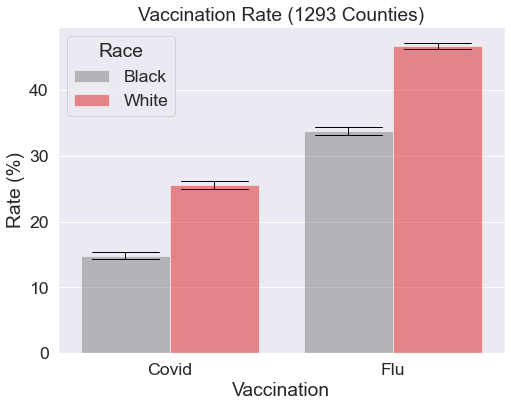

In [14]:

# Rate = T2[['Rate_Diff', 'Rate_Black', 'Rate_White',  'FluDiff', 'FluBlack', 'FluWhite',]].mean()*100
# Rate

# print(T2.shape)

RawData = pd.read_csv('CountyVaccineApril07.csv')

print(RawData.shape)


L = []

for idx, row in RawData.iterrows():
    d = row.to_dict()
    dn = {}
    dn['Vaccination'] = 'Covid'
    dn['Race'] = 'Black'
    dn['Rate (%)'] = d['Rate_Black'] * 100
    L.append(dn)
                    
                    
    dn = {}
    dn['Vaccination'] = 'Covid'
    dn['Race'] = 'White'
    dn['Rate (%)'] = d['Rate_White']* 100
    L.append(dn)
                    
                    
    dn = {}
    dn['Vaccination'] = 'Flu'
    dn['Race'] = 'Black'
    dn['Rate (%)'] = d['FluBlack']* 100
    L.append(dn)
    
    dn = {}
    dn['Vaccination'] = 'Flu'
    dn['Race'] = 'White'
    dn['Rate (%)'] = d['FluWhite']* 100
    L.append(dn)
    
newdf = pd.DataFrame(L)

# newdf
    

import seaborn as sns
sns.set_theme(style="whitegrid")

val = 1.6

sns.set(font_scale=val)



from matplotlib import pyplot
import seaborn

# import mylib

dims = (8, 6)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=dims)
# seaborn.violinplot(ax=ax, data=df, **violin_options)


# df.to_csv('759_rate.csv')
ax = sns.barplot(x="Vaccination" , y="Rate (%)", hue="Race", palette = ['grey', 'red'], alpha = 0.5,
                 data=newdf,errwidth = 1, errcolor = 'black', capsize=.3).set_title('Vaccination Rate (1293 Counties)')
# ax.s

In [15]:
Rate = RawData[['Rate_Diff', 'Rate_Black', 'Rate_White',  'FluDiff', 'FluBlack', 'FluWhite',]].mean()*100
Rate

Rate_Diff     10.908062
Rate_Black    14.776723
Rate_White    25.583498
FluDiff       14.601162
FluBlack      33.757986
FluWhite      46.676721
dtype: float64

### Distribution

/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 1.0)]

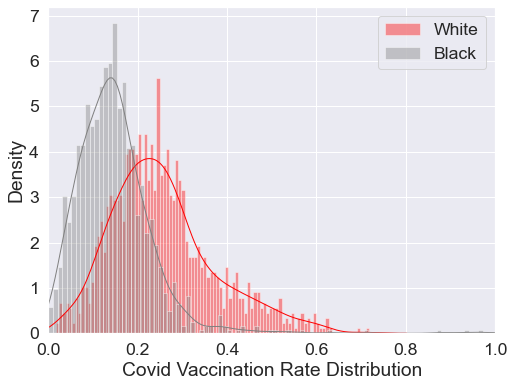

In [16]:
dims = (8, 6)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=dims)



ax = sns.distplot(RawData['Rate_White'], hist=True, kde=True,
            bins=int(100), color = 'red',
            kde_kws={'linewidth': 1}, label='White')
ax = sns.distplot(RawData['Rate_Black'], hist=True, kde=True,
            bins=int(100), color = 'grey',
            kde_kws={'linewidth': 1}, label='Black')
pyplot.legend(loc='best')





ax.set(xlabel='Covid Vaccination Rate Distribution')
ax.set(xlim=(0, 1))


/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/floydluo/opt/miniconda3/envs/ox/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[(0.0, 1.0)]

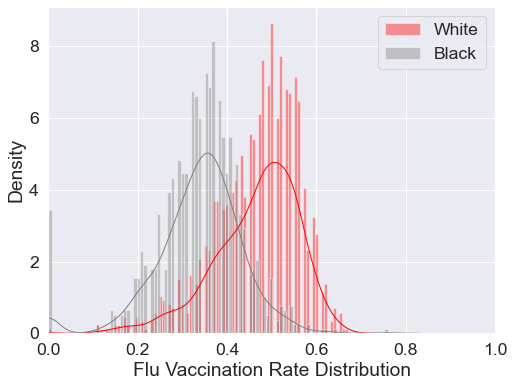

In [17]:
dims = (8, 6)
# df = mylib.load_data()
fig, ax = pyplot.subplots(figsize=dims)



# sns.set_style("whitegrid")
ax = sns.distplot(RawData['FluWhite'], hist=True, kde=True,
            bins=int(100), color = 'red',
            kde_kws={'linewidth': 1}, label='White')
ax = sns.distplot(RawData['FluBlack'], hist=True, kde=True,
            bins=int(100), color = 'grey',
            kde_kws={'linewidth': 1}, label='Black')
pyplot.legend(loc='best')
ax.set(xlabel='Flu Vaccination Rate Distribution')
ax.set(xlim=(0, 1))


## 759 Counties




In [18]:
T3 = T2.loc[newT3.index]
T3.to_csv('ForRegression.csv', index = False)

### Scatter Matrix

In [21]:
import seaborn as sns
sns.set_theme(style="ticks")

cols = ['Rate_DiffY', 'FluDiffY', 'MedianIncome_Diff',  'HighSchool_Diff', 
         'logcases', 'logFacNum', 'CI_Whole',
        'republican','Segregation',  'vehicle',   ]

print(cols)

df = T3[cols]

new_cols = ['CVD (%)', 'FVD (%)', 'Income Disparity',  'High School Disparity',
          'Covid Cases', 'Health Facility Num',  'Home IT Rate', 
         'Political Ideology', 'Segregation', 'Vehicle Rate', ]
df.columns = new_cols
df

['Rate_DiffY', 'FluDiffY', 'MedianIncome_Diff', 'HighSchool_Diff', 'logcases', 'logFacNum', 'CI_Whole', 'republican', 'Segregation', 'vehicle']


,CVD (%),FVD (%),Income Disparity,High School Disparity,Covid Cases,Health Facility Num,Home IT Rate,Political Ideology,Segregation,Vehicle Rate
0,-0.376632,24.0,56757.0,0.015,11.339667,5.669881,0.914,0,49.890444,0.904
2,8.412182,13.0,23524.0,-0.009,9.341105,3.688879,0.891,0,62.099507,0.928
4,-1.366548,13.0,40316.0,-0.030,7.684324,1.609438,0.865,0,19.219010,0.946
5,2.264612,27.0,39955.0,0.007,11.095636,5.093750,0.938,0,52.702580,0.945
6,14.325305,37.0,-57188.0,0.153,7.117206,2.197225,0.840,0,35.769303,0.904
...,...,...,...,...,...,...,...,...,...,...
1257,4.665864,15.0,-2179.0,-0.089,8.045268,2.639057,0.843,0,66.592203,0.933
1260,6.230921,17.0,21917.0,0.017,9.154722,4.290459,0.881,0,66.901068,0.934
1265,8.069566,11.0,638.0,-0.060,7.991592,3.496508,0.857,0,65.099844,0.933
1271,4.347028,0.0,33816.0,0.135,6.751101,2.564949,0.875,0,55.186921,0.923


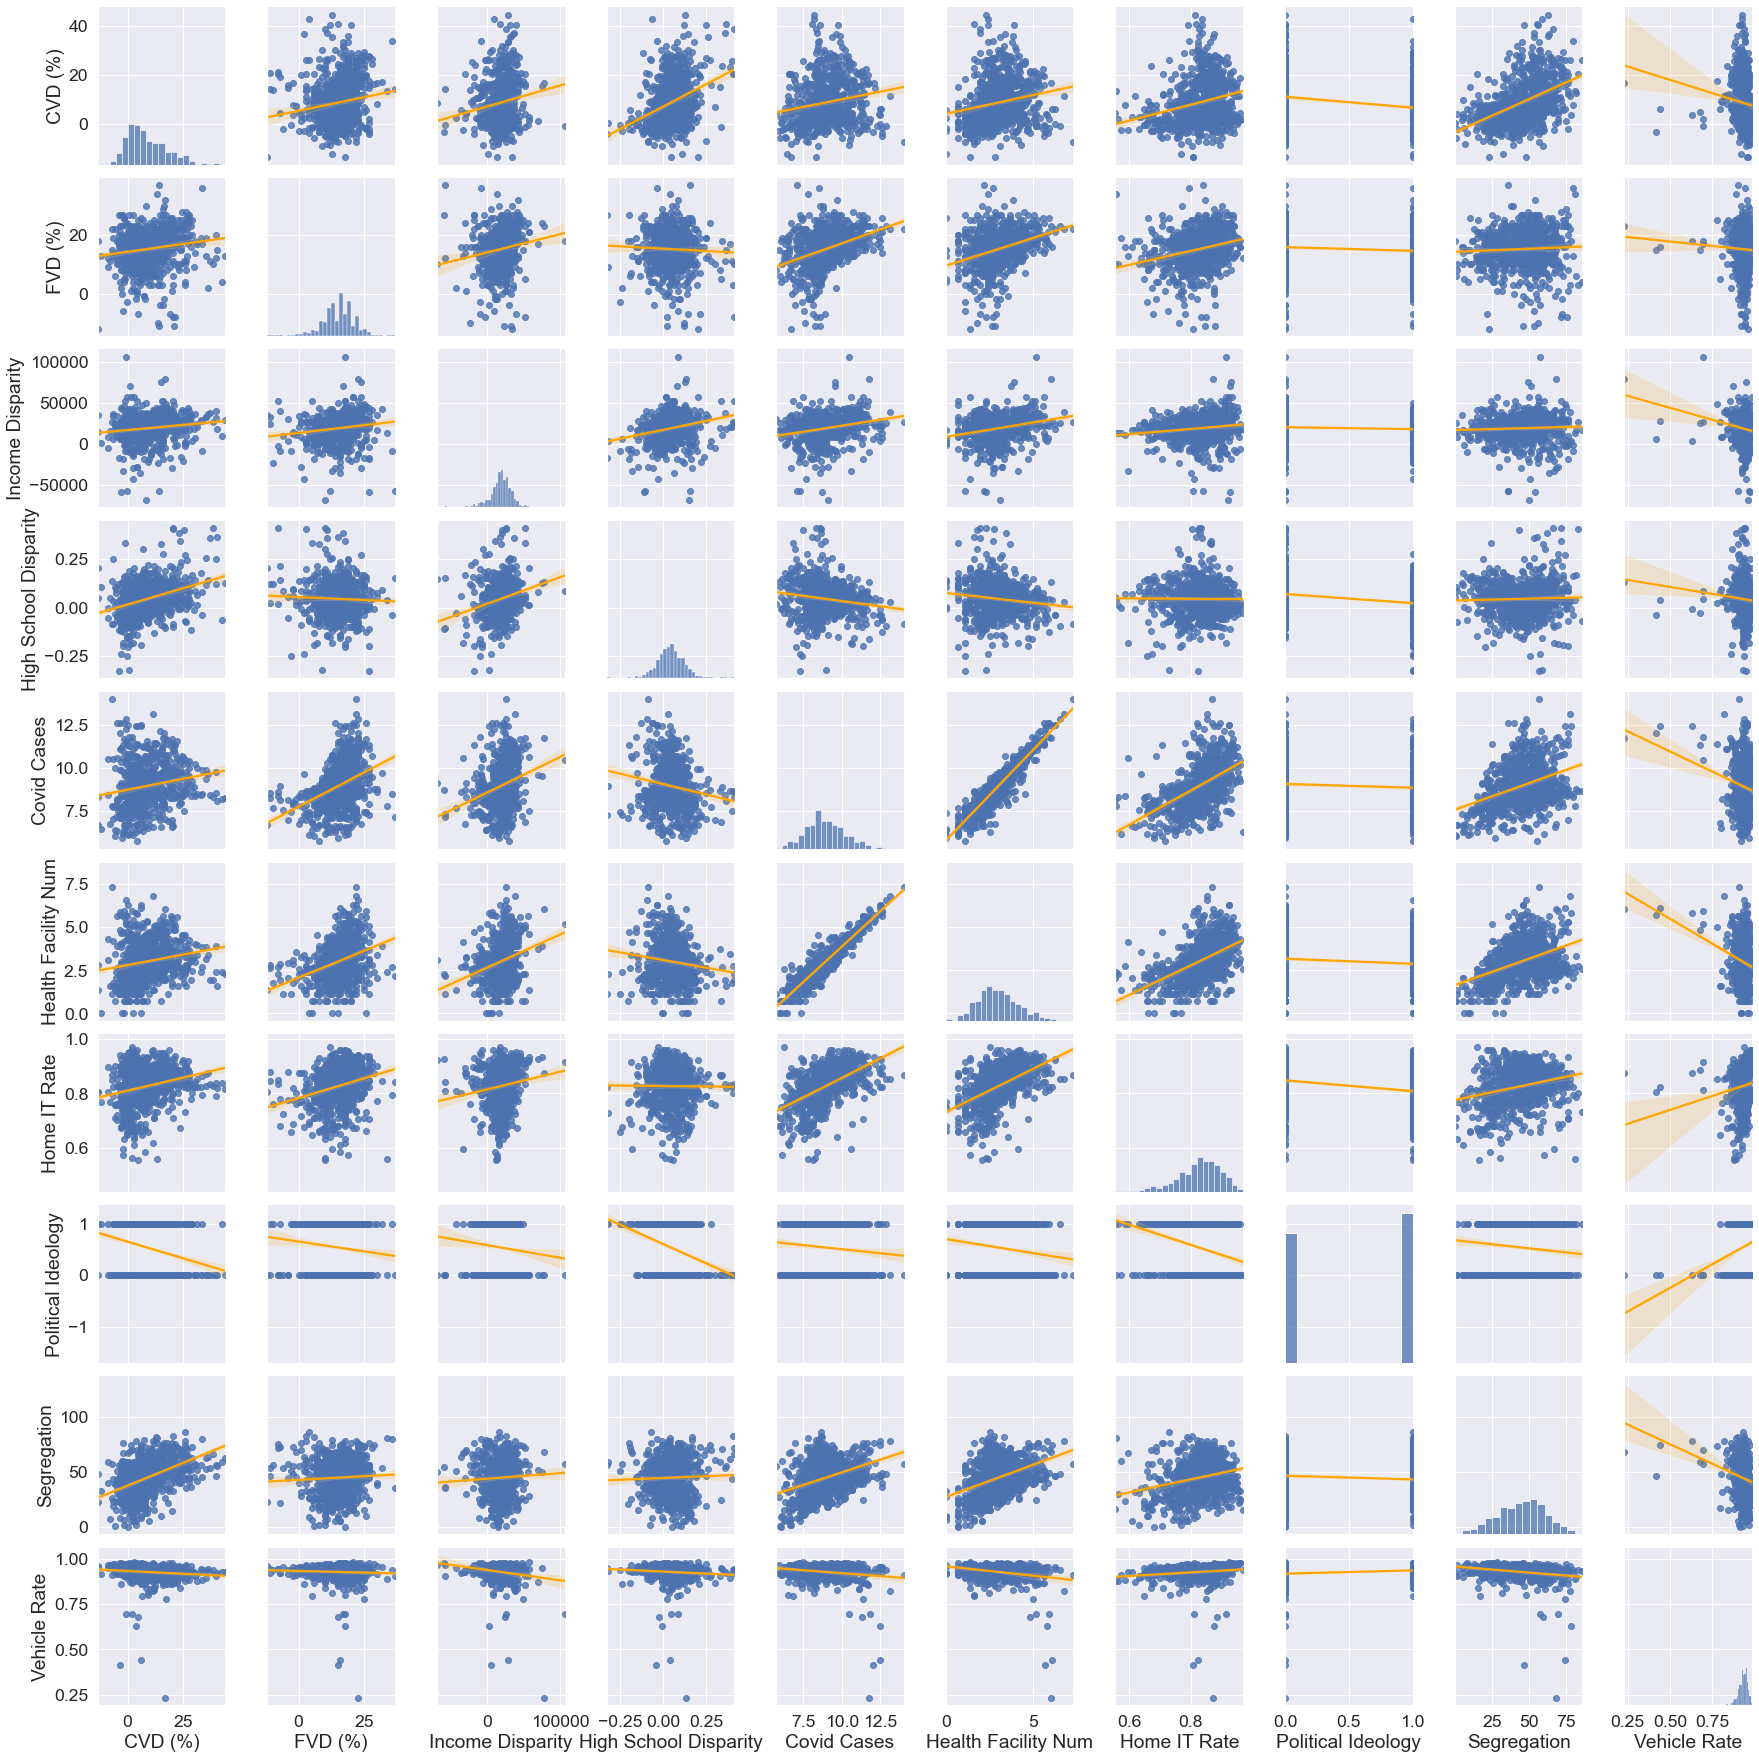

In [22]:
# winsorize 95
val = 1.6

sns.set(font_scale=val)

sns.pairplot(df, 
             kind = 'reg', 
             plot_kws= {
                 'line_kws':{'color':'orange'},
             })